In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

mpl.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

deg2rad = np.pi/180.

In [2]:
ra, dec, run, ar, u, g, r, i, z, uerr, gerr, \
rerr, ierr, zerr, pml, pmb, pmerr = np.loadtxt('Astr511HW1data.dat', skiprows=2, unpack=True)

In [3]:
# Compute metallicities
A = -13.13
B = 14.09
C = 28.04
D = -5.51
E = -5.9
F = -58.68
G = 9.14
H = -20.61
I = 0.0
J = 58.2

x = u - g
y = g - r
metal = A + B*x + C*y + D*x*y + E*x**2. + F*y**2. + G*x**2.*y + H*x*y**2. + I*x**3. + J*y**3.
metal[g-r >= 0.6] = -0.6

In [4]:
# Compute absolute magnitude Mr
x = g - i
Mr0 = -5.06 + 14.32*x - 12.97*x**2. + 6.127*x**3. - 1.267*x**4. + 0.0967*x**5.
deltaMr = 4.50 - 1.11*metal - 0.18*metal**2.
Mr = Mr0 + deltaMr

In [5]:
# Compute distances
D = 10.*10**((r - Mr)/5.) # units of pc
Z = D # distance from galactic plane

## Question 1
For stars with 0.2 < g − r < 0.4, plot ln(ρ) vs. Z, where ρ is the stellar number
density in a given bin (e.g. look at Figs. 5 and 15 in Juri´c et al. 2008, ApJ, 673, 864
for similar examples). You can approximate ρ(Z) = N(Z)/V (Z), where N(Z) is the
number of stars in a given bin, and V (Z) is the bin volume (note that the solid angle
is ∆Ω ∼ 314 sq. deg). What is the Z range where you believe the results, and why?

/astro/apps6/opt/anaconda2.4/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide
/astro/apps6/opt/anaconda2.4/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10


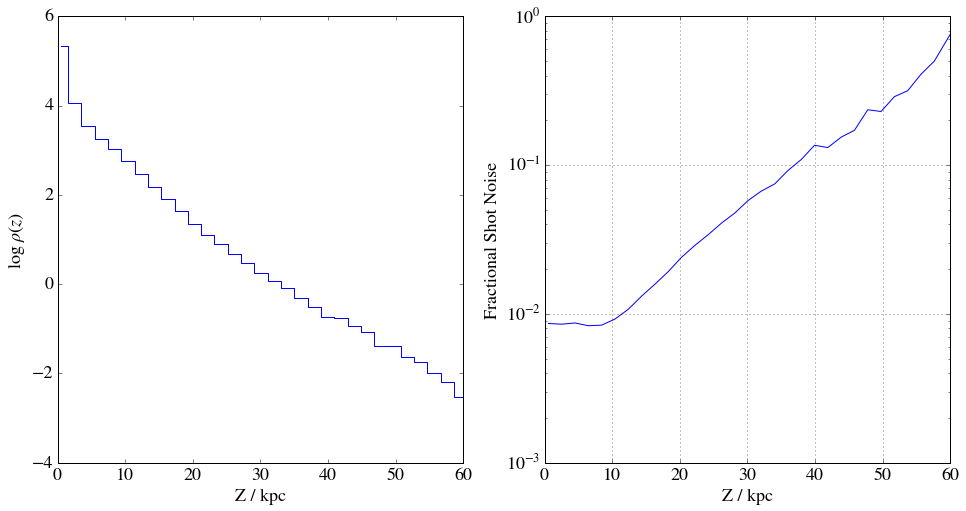

In [6]:
Z_filt = Z[np.logical_and((g-r) >= 0.2, (g-r) < 0.4)]
N, bins = np.histogram(Z_filt, 50)
Z_bins = bins[:-1]
bin_size = bins[1] - bins[0]

delta_omega = 314.*deg2rad**2.
# volume = delta_omega * dD * D^2
V = delta_omega*bin_size*Z_bins**2.
V /= 1e3**3. # convert volume to cubic kpc
rho = N/V

# compute shot noise to determine where the plot becomes unreliable
shot = np.sqrt(1./N)

fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
axes[0].plot(Z_bins/1e3, np.log10(rho), linestyle='steps-mid')
axes[0].set_xlabel('Z / kpc')
axes[0].set_ylabel(r'log $\rho(z)$')
axes[0].set_xlim(0., 60.)
axes[1].semilogy(Z_bins/1e3, shot)
axes[1].grid()
axes[1].set_xlim(0., 60.)
axes[1].set_xlabel('Z / kpc')
axes[1].set_ylabel('Fractional Shot Noise')

The fractional shot noise grows above 1% around 35 kpc. I would say that this is roughly the distance at which the plot becomes unreliable.

## Question 2
Add ln(ρ) vs. Z for stars with 0.4 < g − r < 0.6, 0.6 < g − r < 0.8, and
0.8 < g − r < 1.0 (you can rescale all curves to the same value at some fiducial Z, or
leave them as they are). Discuss the differences compared to the 0.2 < g − r < 0.4
subsample. Why do we expect larger systematic errors for 0.8 < g − r < 1.0 than for
the adjacent bin with 0.4 < g − r < 0.6?

/astro/apps6/opt/anaconda2.4/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in log10
/astro/apps6/opt/anaconda2.4/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in divide


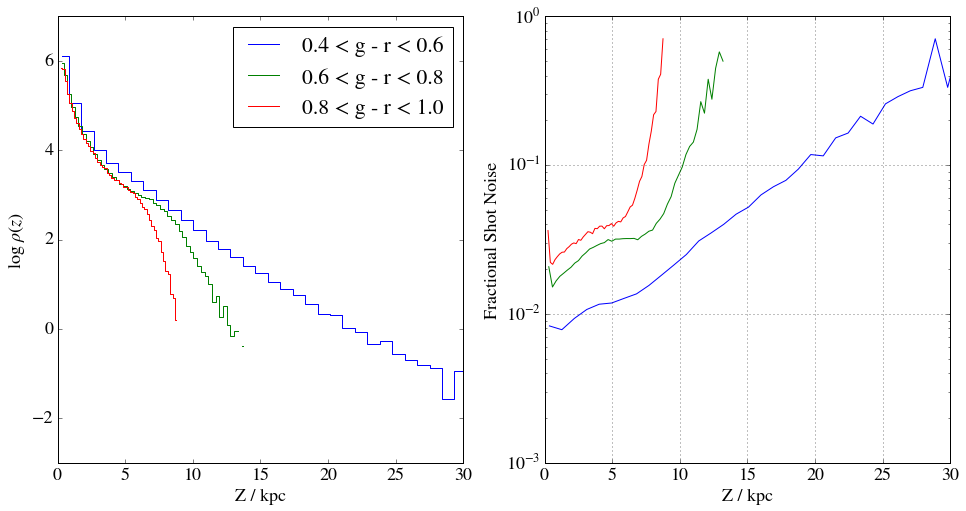

In [7]:
color_low = [0.4, 0.6, 0.8]
color_size = 0.2

Z_bins = []
logRho = []
shot = []

for idx, val in enumerate(color_low):
    Z_filt = Z[np.logical_and((g-r) >= color_low[idx], (g-r) < color_low[idx]+color_size)]
    N, bins = np.histogram(Z_filt, 50)
    bins = bins[:-1]
    Z_bins.append(bins)
    bin_size = bins[1] - bins[0]

    delta_omega = 314.*deg2rad**2.
    # volume = delta_omega * dD * D^2
    V = delta_omega*bin_size*Z_bins[idx]**2.
    V /= 1e3**3. # convert volume to cubic kpc
    rho = N/V
    logRho.append(np.log10(rho))

    # compute shot noise to determine where the plot becomes unreliable
    shot.append(np.sqrt(1./N))
    
fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
for idx, val in enumerate(color_low):
    axes[0].plot(Z_bins[idx]/1e3, logRho[idx], linestyle='steps-mid', \
                 label=str(color_low[idx]) + ' < g - r < ' + str(color_low[idx]+color_size))
    axes[1].semilogy(np.asarray(Z_bins[idx])/1e3, shot[idx],\
                     label=str(color_low[idx])  + ' < g - r < ' + str(color_low[idx]+color_size))
axes[0].set_xlabel('Z / kpc')
axes[0].set_ylabel(r'log $\rho(z)$')
axes[0].set_xlim(0., 30.)
axes[1].grid()
axes[1].set_xlim(0., 30.)
axes[1].set_xlabel('Z / kpc')
axes[1].set_ylabel('Fractional Shot Noise')
axes[0].legend()

For the redder samples, the stellar number density appears to drop off much more quickly. Assuming that the majority of the stars in the sample are on the main sequence, we can infer that the red stars are dimmer. This makes them harder to detect. In addition, these stars are much more suceptible to dust extinction, since dust absorbs red light. This makes it even harder to detect these stars at large distances.

## Question 3
For subsample with 0.2 < g − r < 0.4, separate stars into low-metallicity sample,
[F e/H] < −1.0, and high-metallicity sample, [F e/H] > −1.0. Compare their ln(ρ) vs.
Z curves. What do you conclude?

/astro/apps6/opt/anaconda2.4/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in divide
/astro/apps6/opt/anaconda2.4/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/astro/apps6/opt/anaconda2.4/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in divide
/astro/apps6/opt/anaconda2.4/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in log10


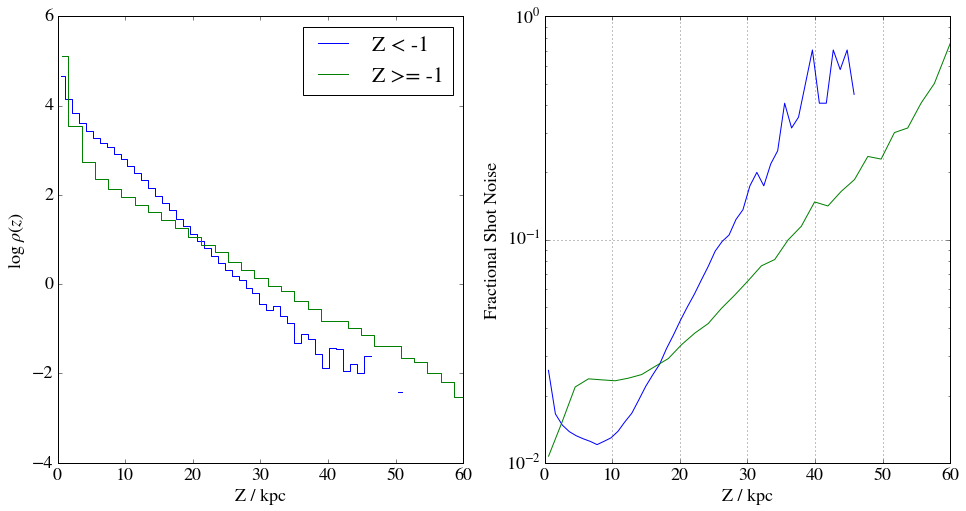

In [8]:
fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
Z_filt_low_metal = Z[np.logical_and(np.logical_and((g-r) >= 0.2, (g-r) < 0.4), metal < -1.)]
N, bins = np.histogram(Z_filt_low_metal, 50)
Z_bins = bins[:-1]
bin_size = bins[1] - bins[0]

delta_omega = 314.*deg2rad**2.
# volume = delta_omega * dD * D^2
V = delta_omega*bin_size*Z_bins**2.
V /= 1e3**3. # convert volume to cubic kpc
rho = N/V

# compute shot noise to determine where the plot becomes unreliable
shot = np.sqrt(1./N)

axes[0].plot(Z_bins/1e3, np.log10(rho), linestyle='steps-mid', label='Z < -1')
axes[1].semilogy(Z_bins/1e3, shot)

Z_filt_high_metal = Z[np.logical_and(np.logical_and((g-r) >= 0.2, (g-r) < 0.4), metal >= -1.)]
N, bins = np.histogram(Z_filt_high_metal, 50)
Z_bins = bins[:-1]
bin_size = bins[1] - bins[0]

delta_omega = 314.*deg2rad**2.
# volume = delta_omega * dD * D^2
V = delta_omega*bin_size*Z_bins**2.
V /= 1e3**3. # convert volume to cubic kpc
rho = N/V

shot = np.sqrt(1./N)

axes[0].plot(Z_bins/1e3, np.log10(rho), linestyle='steps-mid', label='Z >= -1')
axes[1].semilogy(Z_bins/1e3, shot)

axes[0].set_xlabel('Z / kpc')
axes[0].set_ylabel(r'log $\rho(z)$')
axes[0].set_xlim(0., 60.)
axes[0].legend()
axes[1].grid()
axes[1].set_xlim(0., 60.)
axes[1].set_xlabel('Z / kpc')
axes[1].set_ylabel('Fractional Shot Noise')

If you look closely at the first bin, there are more metal rich stars than metal poor stars. This makes sense because we typically find metal poor stars further away from the disk of the milky way.

Beyond ~1 kpc, there are more metal poor than metal rich stars. There is another turnover that happens around 20 kpc, but the fractional shot noise of the low metallicity population gets large at this point, so the data might not be reliable beyond this point.

## Question 4
For these low-metallicity and high-metallicity samples, plot and compare their
differential r band magnitude distributions (i.e. the number of sources per unit
magnitude, in small, say 0.1 mag wide, r bins). What do you conclude? How would
you numerically describe these curves (i.e. what kind of functional form for the fitting
functions would you choose)?

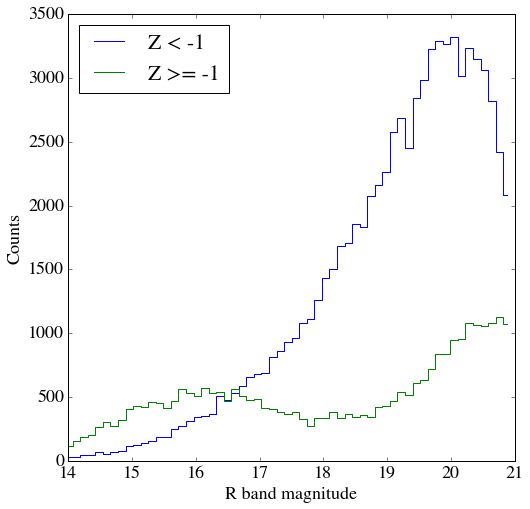

In [9]:
fig, axes = plt.subplots(figsize=(8,8))
mag_bin_size = 0.1

r_filt_low_metal = r[np.logical_and(np.logical_and((g-r) >= 0.2, (g-r) < 0.4), metal < -1.)]
mag_bins = np.linspace(np.min(r_filt_low_metal), np.max(r_filt_low_metal), 
                       num=int(np.max(r_filt_low_metal)-np.min(r_filt_low_metal))/mag_bin_size)
N, bins = np.histogram(r_filt_low_metal, bins=mag_bins)
bins = bins[:-1]
axes.plot(bins, N, linestyle='steps-mid', label='Z < -1')

r_filt_high_metal = r[np.logical_and(np.logical_and((g-r) >= 0.2, (g-r) < 0.4), metal >= -1.)]
mag_bins = np.linspace(np.min(r_filt_low_metal), np.max(r_filt_low_metal), 
                       num=int(np.max(r_filt_low_metal)-np.min(r_filt_low_metal))/mag_bin_size)
N, bins = np.histogram(r_filt_high_metal, bins=mag_bins)
bins = bins[:-1]
axes.plot(bins, N, linestyle='steps-mid', label='Z >= -1')

axes.set_xlabel('R band magnitude')
axes.set_ylabel('Counts')
axes.legend(loc=2)

Because larger magnitude corresponds to larger distance, this plot again shows that metal rich stars are nearby, while metal poor stars are further away.

The metal poor population is shaped like a Boltzmann distribution, flipped across the x axis. It could be modeled with a function of the form $r_0 - r^2 e^{r^2}$. The peaks in the metal rich population have gaussian shapes. That distribution could probably be modeled by summing two gaussian functions together.

## Question 5
What should be the faint r band limit for a survey to be able to map the ln(ρ)
vs. Z profile out to 100 kpc using main-sequence stars? Assume the same color
distribution as for the SDSS sample. For a solid angle of 1 deg2
, how many stars
with 0.2 < g − r < 0.4 would you expect with distances between 90 kpc and 100
kpc? Assume whatever additional information you need to solve this problem (not all
required information is provided here).

First, do a color cut of 0.2 < g - r < 0.4. This gives us mostly main sequence stars. Next, plot r magnitude vs log(distance) and fit a line to it to extrapolate to D = 100 kpc.

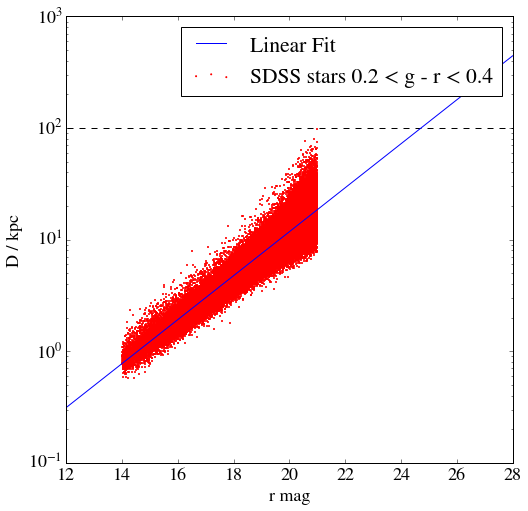

In [10]:
Z_filt = Z[np.logical_and((g-r) >= 0.2, (g-r) < 0.4)]
r_filt = r[np.logical_and((g-r) >= 0.2, (g-r) < 0.4)]

p = np.polyfit(r_filt, np.log10(Z_filt/1e3), 1)

r_model = np.linspace(12., 28.)
Z_model = p[0]*r_model + p[1]

fig, axes = plt.subplots(figsize=(8,8))
axes.scatter(r_filt, Z_filt/1e3, s=1, color='r', label='SDSS stars 0.2 < g - r < 0.4')
axes.plot(r_model, 10.**Z_model, label='Linear Fit')
axes.hlines(100., 0., 30., linestyle='--')
axes.set_yscale('log')
axes.set_xlabel('r mag')
axes.set_ylabel('D / kpc')
axes.set_xlim(12., 28.)
axes.legend()

The dashed horizontal line shows where our model hits D = 100 kpc. This corresponds to an r magnitude limit of about 25, which means that the telescope will need to observe stars that faint in order to detect something 100 kpc away.

To estimate the number of stars with 0.2 < g - r < 0.4 between 90 and 100 kpc, we examine our plot of log($\rho$) vs Z, this time using a solid angle of 1 square degree.

Number of stars between 90 and 100 kpc: 0.000106219022574


/astro/apps6/opt/anaconda2.4/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10


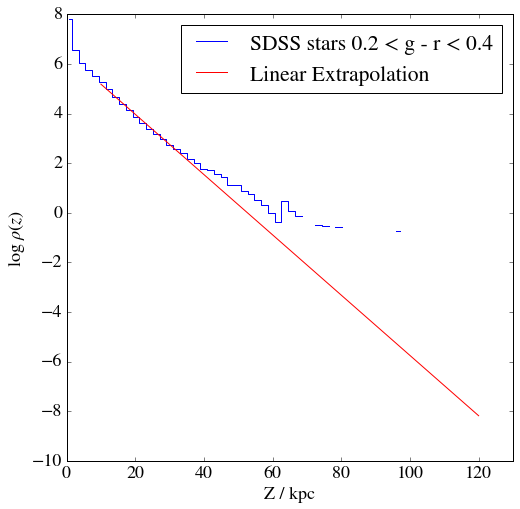

In [12]:
Z_filt = Z[np.logical_and((g-r) >= 0.2, (g-r) < 0.4)]
N, bins = np.histogram(Z_filt, 50)
Z_bins = bins[:-1]
bin_size = bins[1] - bins[0]

delta_omega = 1.*deg2rad**2.
# volume = delta_omega * dD * D^2
V = delta_omega*bin_size*Z_bins**2.
V /= 1e3**3. # convert volume to cubic kpc
rho = N/V

Z_bins_linear = Z_bins[np.logical_and(Z_bins/1e3 > 10., Z_bins/1e3 < 35.)]
rho_linear = rho[np.logical_and(Z_bins/1e3 > 10., Z_bins/1e3 < 35.)]
p = np.polyfit(Z_bins_linear/1e3, np.log10(rho_linear), 1)

Z_model = np.linspace(10., 120.)
log_rho_model = p[0]*Z_model + p[1]
fig, axes = plt.subplots(figsize=(8,8))
axes.plot(Z_bins/1e3, np.log10(rho), linestyle='steps-mid', label='SDSS stars 0.2 < g - r < 0.4')
axes.plot(Z_model, log_rho_model, color='red', label='Linear Extrapolation')
axes.set_xlabel('Z / kpc')
axes.set_ylabel(r'log $\rho(z)$')
axes.set_xlim(0., 130.)
axes.legend()

# Integrate the model function between 90 and 100 kpc to get the number of stars in that interval
Z_bin_size = Z_model[1] - Z_model[0]
log_rho_subset = log_rho_model[np.logical_and(Z_model >= 90., Z_model <= 100.)]
n_stars = Z_bin_size*np.sum(10.**log_rho_subset)
print 'Number of stars between 90 and 100 kpc: ' + str(n_stars)

After about 10 kpc, the relation appears to be linear. It's hard to say what happens after ~35 kpc because the counts get so low, but I will assume that the relation stays linear. Extrapolating the distribution out to 100 kpc and integrating the counts, gives us < 1 star, which means that there are essentially no stars out this far.